# Regression Project

Forest Hensley - codeup/innis - 2020 mar 30

---

## Objective : 

"We want to be able to predict the property values ('taxvaluedollarcnt') of Single Family Properties that had a transaction during 2017."  
> https://ds.codeup.com/regression/project/

- a.k.a: eliminate the zestimate
- a.k.a: zestimate don't rate
- a.k.a: "zestimate", more like, 'let me rest, mate' (because their models performance is 😴 on the job compared to ours 🥇)



### Dataset : Zillow  

- #### Description: 

	properties_2017.csv - all the properties with their home features for 2017 (released on 10/2/2017)

- #### Profile :

	"Zillow’s Zestimate home valuation has shaken up the U.S. real estate industry since first released over 11 years ago.

	A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important. The Zestimate was created to give consumers as much information as possible about homes and the housing market, marking the first time consumers had access to this type of home value information at no cost.

	“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning."

	> https://www.kaggle.com/competitions/zillow-prize-1/data



---

## Acquire

`acquire.py` takes the 🍰 on this req 🎉

In [1]:
from imports import *
from acquire import wrangle_zillow

# import essential packages from imports.py
# import wrangle zillow from acquire.py

zillow = wrangle_zillow()

# zillow is now tidy : munged, split, scaled
# 😭 no dummy variables


Using cached csv


`zillow` will hang out for our data viz portion 📊

In [2]:
zillow[0].info()

# zillow = [train_scaled, validate_scaled, test_scaled]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278128 entries, 0 to 1278127
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   beds            1278128 non-null  float64 
 1   baths           1278128 non-null  float64 
 2   sqft            1278128 non-null  float64 
 3   property_value  1278128 non-null  float64 
 4   year            1278128 non-null  category
 5   taxes           1278128 non-null  float64 
 6   fips            1278128 non-null  category
dtypes: category(2), float64(5)
memory usage: 52.4 MB


---

## Wrangle

`prepare.py` does the heavy 🦾 on this req 💽

In [3]:
import prepare as prep

# import ml_data from prepare.py

In [4]:
targets=['taxes','property_value']

# identify targets for modeling

In [5]:
trunk = prep.ml_data(zillow[0],zillow[1],zillow[2], targets)

# trunk contains all of the data sets we need for modeling
# 😭 no dummy variables
# trunk = [X_train, y_train, X_validate, y_validate, X_test, y_test]

These are the data sets we will use for modeling 💅

In [6]:
X_train, y_train, X_validate, y_validate, X_test, y_test = trunk[0], trunk[1], trunk[2], trunk[3], trunk[4], trunk[5] 

X_train.info()

# assign variables for modeling


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278128 entries, 0 to 1278127
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   beds    1278128 non-null  float64 
 1   baths   1278128 non-null  float64 
 2   sqft    1278128 non-null  float64 
 3   year    1278128 non-null  category
 4   fips    1278128 non-null  category
dtypes: category(2), float64(3)
memory usage: 32.9 MB


---

## Worth the ask...

### Does sqaure footage effect property value? 

- At first 👀 , sqaure footage seems to affect property value.

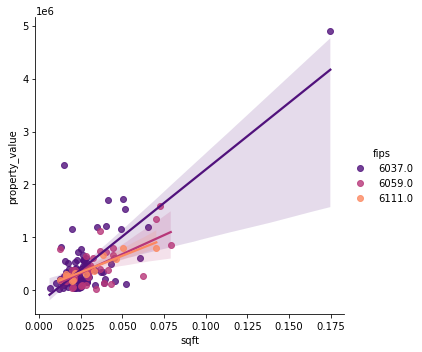

In [7]:
sns.lmplot(data=zillow[0].sample(150), x='sqft', y='property_value',palette='magma', hue='fips')

# viz

#### Use Pearson's R to test the variable for independence:

- $ H_0 = \textrm{"Variables are independent." }$  
- $ H_1 = \textrm{"Variables are NOT independent." }$

In [8]:
r,p=prep.pearsons_r_p(zillow[0]['sqft'],zillow[0]['property_value'])

# stat

r = 0.6129
p = 0.0000

Reject H_0
moderate correlation


There is a statistically relevant correlation between square footage and property value 📈



### Does number of beds effect property value?

- At first 👀 , number of beds seems to affect property value.

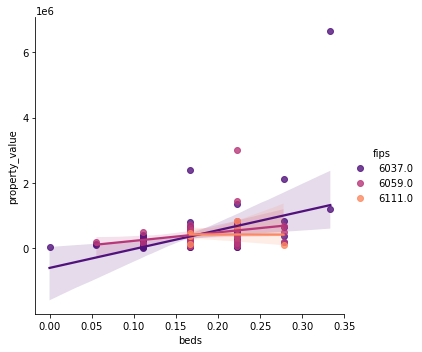

In [9]:
sns.lmplot(data=zillow[0].sample(150), x='beds', y='property_value', palette='magma', hue='fips')

# viz

#### Use Pearson's R to test the variable for independence:

- $ H_0 = \textrm{"Variables are independent." }$  
- $ H_1 = \textrm{"Variables are NOT independent." }$

In [10]:
r,p=prep.pearsons_r_p(zillow[0]['beds'],zillow[0]['property_value'])

# stat

r = 0.2586
p = 0.0000

Reject H_0
weak correlation


There is a statistically relevant correlation between number of beds and property value 📈



### Does number of baths effect property value?

- At first 👀 , number of baths seems to affect property value.

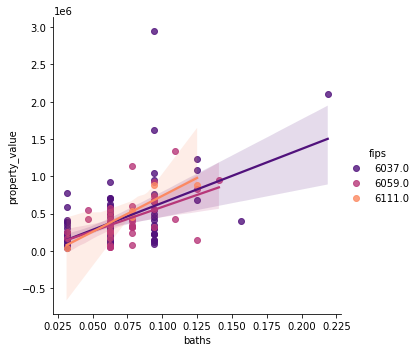

In [11]:
sns.lmplot(data=zillow[0].sample(150), x='baths', y='property_value', palette='magma', hue='fips')

# viz

#### Use Pearson's R to test the variable for independence:

- $ H_0 = \textrm{"Variables are independent." }$  
- $ H_1 = \textrm{"Variables are NOT independent." }$

In [12]:
r,p=prep.pearsons_r_p(zillow[0]['baths'],zillow[0]['property_value'])

# stat

r = 0.5076
p = 0.0000

Reject H_0
moderate correlation


There is a statistically relevant correlation between number of baths and property value 📈



### What is the optimal ratio of beds/baths?

In [13]:
# viz

# ➕⏳⏩🌠

In [14]:
# stat

# ➕⏳⏩🔣

### Why do some properties have a much higher value than others when they are located so close to each other?

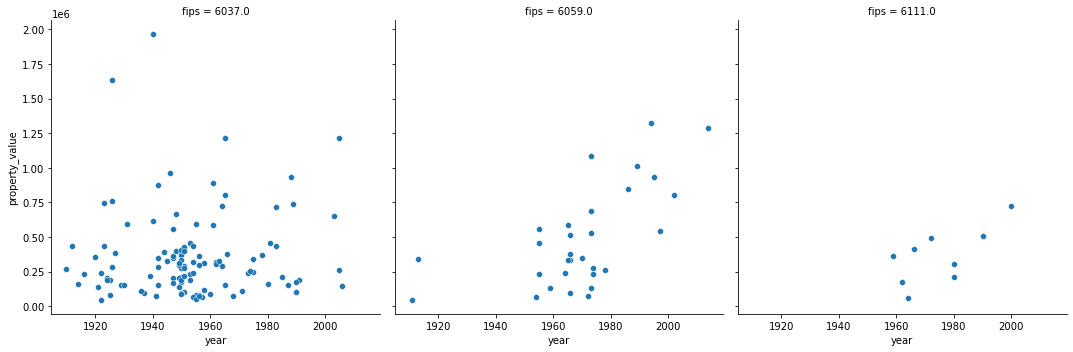

In [15]:
sns.relplot(data=zillow[0].sample(150), x='year', y='property_value', palette='magma', col='fips')

# viz

#### Use Pearson's R to test the variable for independence:

- $ H_0 = \textrm{"Variables are independent." }$  
- $ H_1 = \textrm{"Variables are NOT independent." }$

In [16]:
r,p=prep.pearsons_r_p(zillow[0]['year'],zillow[0]['property_value'])

# stat

r = 0.1919
p = 0.0000

Reject H_0
no correlation


There is NOT a statistically relevant correlation between year and property value 📈  
	... ➕⏳⏩ run a t-test and filter by fip.

#### Takeaways:
Square footage has the highest r-value and is confirmed to be moderatly correlated to our target.

Square footage will be selected as our feature.

---

## Model

### Baseline

Establish baseline to determine the validity of our various models. In this case median is used since outliers have not been addressed.

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [26]:

y_train['yhat_base_prop']=y_train.property_value.median()

# evaluate: rmse
mse_baseline = mean_squared_error(y_train.property_value, y_train.yhat_base_prop)


### Linear Regression (OLS)

In [42]:
model = LinearRegression().fit(X_train[['sqft']],y_train['property_value'])

y_train['yhat_prop_ols'] = model.predict(X_train[['sqft']])

mse_ols = mean_squared_error(y_train.property_value, y_train.yhat_prop_ols)

print("MSE OLS sklearn: ","{:.2e}".format(mse_ols)) 

if mse_ols-mse_baseline<0:
	print("y_hat superior")
else:
	print("yhat_baseline superior")


MSE OLS sklearn:  2.84e+11
y_hat superior


### LassoLars

In [31]:
lars = LassoLars(alpha=1.0)

# create the model object

lars.fit(X_train[['sqft']], y_train.property_value)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!

y_train['yhat_prop_lars'] = lars.predict(X_train[['sqft']])

# predict train

# evaluate: rmse
mse_lars_train = mean_squared_error(y_train.property_value, y_train.yhat_prop_lars)


print("MSE for Lasso + Lars\nTraining/In-Sample: ","{:.2e}".format(mse_lars_train))

if mse_lars_train-mse_baseline<0:
	print("y_hat superior")
else:
	print("yhat_baseline superior")



MSE for Lasso + Lars
Training/In-Sample:  2.84e+11
y_hat superior


### Tweedie Regressor

In [35]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train[['sqft']], y_train.property_value)

# predict train
y_train['yhat_prop_glm'] = glm.predict(X_train[['sqft']])

# evaluate: mse
mse_glm_train = mean_squared_error(y_train.property_value, y_train.yhat_prop_glm)


print("MSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ","{:.2e}".format( mse_glm_train))


MSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  2.80e+13


### Polynomial Regression

PolynomialFeatures

In [36]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train[['sqft']])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate[['sqft']])
X_test_degree2 = pf.transform(X_test[['sqft']])


LinearRegression

In [41]:
# create the model object
lmp = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lmp.fit(X_train_degree2,y_train.property_value)

# predict train
y_train['yhat_prop_lmp'] = lmp.predict(X_train_degree2)

# evaluate: rmse
mse_lmp_train = mean_squared_error(y_train.property_value, y_train.yhat_prop_lmp)

print("MSE for Polynomial Model, degrees=2\nTraining/In-Sample: ","{:.2e}".format( mse_lmp_train))

MSE for Polynomial Model, degrees=2
Training/In-Sample:  2.70e+11


### Validate

In [50]:
y_validate['yhat_val_base'] = y_validate.property_value.median()

y_validate['yhat_val_ols'] = model.predict(X_validate[['sqft']])

y_validate['yhat_val_lars'] = lars.predict(X_validate[['sqft']])

y_validate['yhat_val_glm'] = glm.predict(X_validate[['sqft']])

y_validate['yhat_val_lmp'] = lmp.predict(X_validate_degree2)

y_validate.head()


,taxes,property_value,yhat_prop_lmp,yhat_val_ols,yhat_val_lars,yhat_val_glm,yhat_val_lmp,yhat_val_base
0,0.004161,407191.0,446637.107514,467012.556323,466998.291444,451237.549458,446637.107514,327748.0
1,0.007203,582550.0,700660.317763,762357.016510,761535.689573,501874.440973,700660.317763,327748.0
2,0.010622,977685.0,129086.850139,60008.285791,61106.205998,389719.877252,129086.850139,327748.0
3,0.001628,134533.0,70403.211276,-20966.385834,-19647.193201,378519.862900,70403.211276,327748.0
4,0.004027,306866.0,303679.787257,289720.643714,290190.848988,423328.973529,303679.787257,327748.0


In [69]:

mse_base_val = mean_squared_error(y_validate.property_value, y_validate.yhat_val_base)

mse_ols_val = mean_squared_error(y_validate.property_value, y_validate.yhat_val_ols)

mse_lars_val = mean_squared_error(y_validate.property_value, y_validate.yhat_val_lars)

mse_glm_val = mean_squared_error(y_validate.property_value, y_validate.yhat_val_glm)

mse_lmp_val = mean_squared_error(y_validate.property_value, y_validate.yhat_val_lmp)

mse_val=[mse_base_val,mse_ols_val,mse_lars_val,mse_glm_val,mse_lmp_val]

In [70]:
mse_val=pd.DataFrame(mse_val,index=['mse_base_val','mse_ols_val','mse_lars_val','mse_glm_val','mse_lmp_val' ],columns=['mse'])
mse_val

,mse
mse_base_val,4.493966e+11
mse_ols_val,6.083990e+11
mse_lars_val,6.065361e+11
mse_glm_val,2.256184e+132
mse_lmp_val,7.420656e+14


We can see that our median baseline is the most effective predictor in this case. The best model is the is Lasso Lars model. We will use this model for our test.

### Test

In [75]:
model = LinearRegression().fit(X_test[['sqft']],y_test['property_value'])

y_test['yhat_test_ols'] = model.predict(X_test[['sqft']])

mse_ols = mean_squared_error(y_test.property_value, y_test.yhat_test_ols)

print("MSE OLS sklearn: ","{:.2e}".format(mse_ols)) 

y_test['test_baseline'] = y_test['property_value'].median()

mse_test_baseline=mean_squared_error(y_test.property_value, y_test.test_baseline)

if mse_ols-mse_test_baseline<0:
	print("y_hat superior")
else:
	print("yhat_baseline superior")


MSE OLS sklearn:  4.11e+11
y_hat superior


Our model performs better than the baseline.

## Summary

- Square footage can be used to estimate property value.

### Next steps...

- Cleaner data: the data had a lot of missing or erroneous information.

- Feature engineering: explore erroneous information for clues to other features.

- Model selection: use sklearn tools.